<a href="https://colab.research.google.com/github/dnstjr4567/mo2023-1/blob/main/%EC%A0%84%EB%A0%A5%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import time
import pandas as pd
from keras.datasets import mnist
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_iris, make_circles, make_moons
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, auc, f1_score, mean_squared_error, accuracy_score
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from google.colab import files
import io

In [ ]:
uploaded = files.upload()

Saving building_info.csv to building_info.csv


In [ ]:
uploaded1 = files.upload()

Saving test.csv to test.csv


In [ ]:
uploaded2 = files.upload()

Saving train.csv to train.csv


In [ ]:
uploaded3 = files.upload()

Saving sample_submission.csv to sample_submission.csv


In [ ]:
building = pd.read_csv(io.BytesIO(uploaded['building_info.csv']),encoding='cp949')
test = pd.read_csv(io.BytesIO(uploaded1['test.csv']),encoding='cp949')
train = pd.read_csv(io.BytesIO(uploaded2['train.csv']),encoding='cp949')
sub = pd.read_csv(io.BytesIO(uploaded3['sample_submission.csv']),encoding='cp949')

In [ ]:
train

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh),Unnamed: 10
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28,NaN
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36,NaN
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88,NaN
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76,NaN
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40,NaN
...,...,...,...,...,...,...,...,...,...,...,...
203995,100_20220824 19,100,20220824 19,23.1,NaN,0.9,86.0,0.5,NaN,881.04,NaN
203996,100_20220824 20,100,20220824 20,22.4,NaN,1.3,86.0,0.0,NaN,798.96,NaN
203997,100_20220824 21,100,20220824 21,21.3,NaN,1.0,92.0,NaN,NaN,825.12,NaN
203998,100_20220824 22,100,20220824 22,21.0,NaN,0.3,94.0,NaN,NaN,640.08,NaN


In [ ]:
grouped = train.groupby(['건물번호'])['전력소비량(kWh)'].sum()
pd.set_option('display.max_rows', 100)
grouped = pd.DataFrame(grouped)
grouped

,전력소비량(kWh)
건물번호,
1,5.412164e+06
2,3.421114e+06
3,2.945920e+06
4,2.030669e+06
5,5.587661e+06
6,4.024930e+06
7,1.577246e+06
8,2.708025e+06
9,4.772748e+06


/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:134: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:134: UserWarning: Glyph 47932 (\N{HANGUL SYLLABLE MUL}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:134: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:134: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:134: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:134: UserWarning: Glyph 47141 (\N{HANGUL SYLLA

import numpy as np
from google.colab import autoviz
df_8840794617355198936 = autoviz.get_df('df_8840794617355198936')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8840794617355198936, *['전력소비량(kWh)'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8840794617355198936 = autoviz.get_df('df_8840794617355198936')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8840794617355198936, *['전력소비량(kWh)'], **{})
chart

In [ ]:
train = train.iloc[:,3:10]

In [ ]:

train= train.fillna(0)
train

,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,18.6,0.0,0.9,42.0,0.0,0.0,1085.28
1,18.0,0.0,1.1,45.0,0.0,0.0,1047.36
2,17.7,0.0,1.5,45.0,0.0,0.0,974.88
3,16.7,0.0,1.4,48.0,0.0,0.0,953.76
4,18.4,0.0,2.8,43.0,0.0,0.0,986.40
...,...,...,...,...,...,...,...
203995,23.1,0.0,0.9,86.0,0.5,0.0,881.04
203996,22.4,0.0,1.3,86.0,0.0,0.0,798.96
203997,21.3,0.0,1.0,92.0,0.0,0.0,825.12
203998,21.0,0.0,0.3,94.0,0.0,0.0,640.08


In [ ]:
train.describe()

,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
count,204000.000000,204000.000000,204000.000000,204000.000000,204000.000000,204000.000000,204000.000000
mean,25.543524,0.439489,2.133832,78.712819,0.210679,0.605373,2451.036462
std,3.779523,2.539497,1.358202,15.088790,0.357338,0.920739,2440.648858
min,10.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.400000,0.000000,1.200000,69.000000,0.000000,0.000000,1085.760000
50%,25.700000,0.000000,2.000000,81.000000,0.000000,0.040000,1766.400000
75%,28.100000,0.000000,2.800000,91.000000,0.300000,0.930000,2970.000000
max,37.100000,92.200000,13.300000,100.000000,1.000000,3.920000,25488.400000


In [ ]:
import statistics
def z_score_normalization(x):
    mean = np.mean(x)
    std_dev = np.std(x)
    z_score = (x - mean) / std_dev
    return z_score

# 데이터프레임의 모든 열에 Z-score 정규화 적용
df_normalized = train.apply(z_score_normalization)

print(df_normalized)

           기온(C)   강수량(mm)   풍속(m/s)     습도(%)    일조(hr)  일사(MJ/m2)  \
0      -1.837147 -0.173062 -0.908433 -2.433125 -0.589581  -0.657487   
1      -1.995898 -0.173062 -0.761179 -2.234301 -0.589581  -0.657487   
2      -2.075273 -0.173062 -0.466671 -2.234301 -0.589581  -0.657487   
3      -2.339857 -0.173062 -0.540298 -2.035478 -0.589581  -0.657487   
4      -1.890064 -0.173062  0.490479 -2.366850 -0.589581  -0.657487   
...          ...       ...       ...       ...       ...        ...   
203995 -0.646518 -0.173062 -0.908433  0.482955  0.809659  -0.657487   
203996 -0.831727 -0.173062 -0.613925  0.482955 -0.589581  -0.657487   
203997 -1.122770 -0.173062 -0.834806  0.880602 -0.589581  -0.657487   
203998 -1.202145 -0.173062 -1.350195  1.013151 -0.589581  -0.657487   
203999 -1.281520 -0.173062 -1.497449  1.079425 -0.589581  -0.657487   

        전력소비량(kWh)  
0        -0.559589  
1        -0.575126  
2        -0.604823  
3        -0.613476  
4        -0.600103  
...            ...  


In [ ]:
df_normalized.corr()

,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
기온(C),1.000000,-0.068643,0.220072,-0.389588,0.419242,0.463308,0.171190
강수량(mm),-0.068643,1.000000,0.048103,0.199485,-0.100483,-0.099372,0.015083
풍속(m/s),0.220072,0.048103,1.000000,-0.218568,0.167946,0.225497,0.109956
습도(%),-0.389588,0.199485,-0.218568,1.000000,-0.571982,-0.560770,-0.129374
일조(hr),0.419242,-0.100483,0.167946,-0.571982,1.000000,0.764701,0.094748
일사(MJ/m2),0.463308,-0.099372,0.225497,-0.560770,0.764701,1.000000,0.177750
전력소비량(kWh),0.171190,0.015083,0.109956,-0.129374,0.094748,0.177750,1.000000


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54413 (\N{HANGUL SYLLABLE PUNG}) missing from current font.
  func(*a

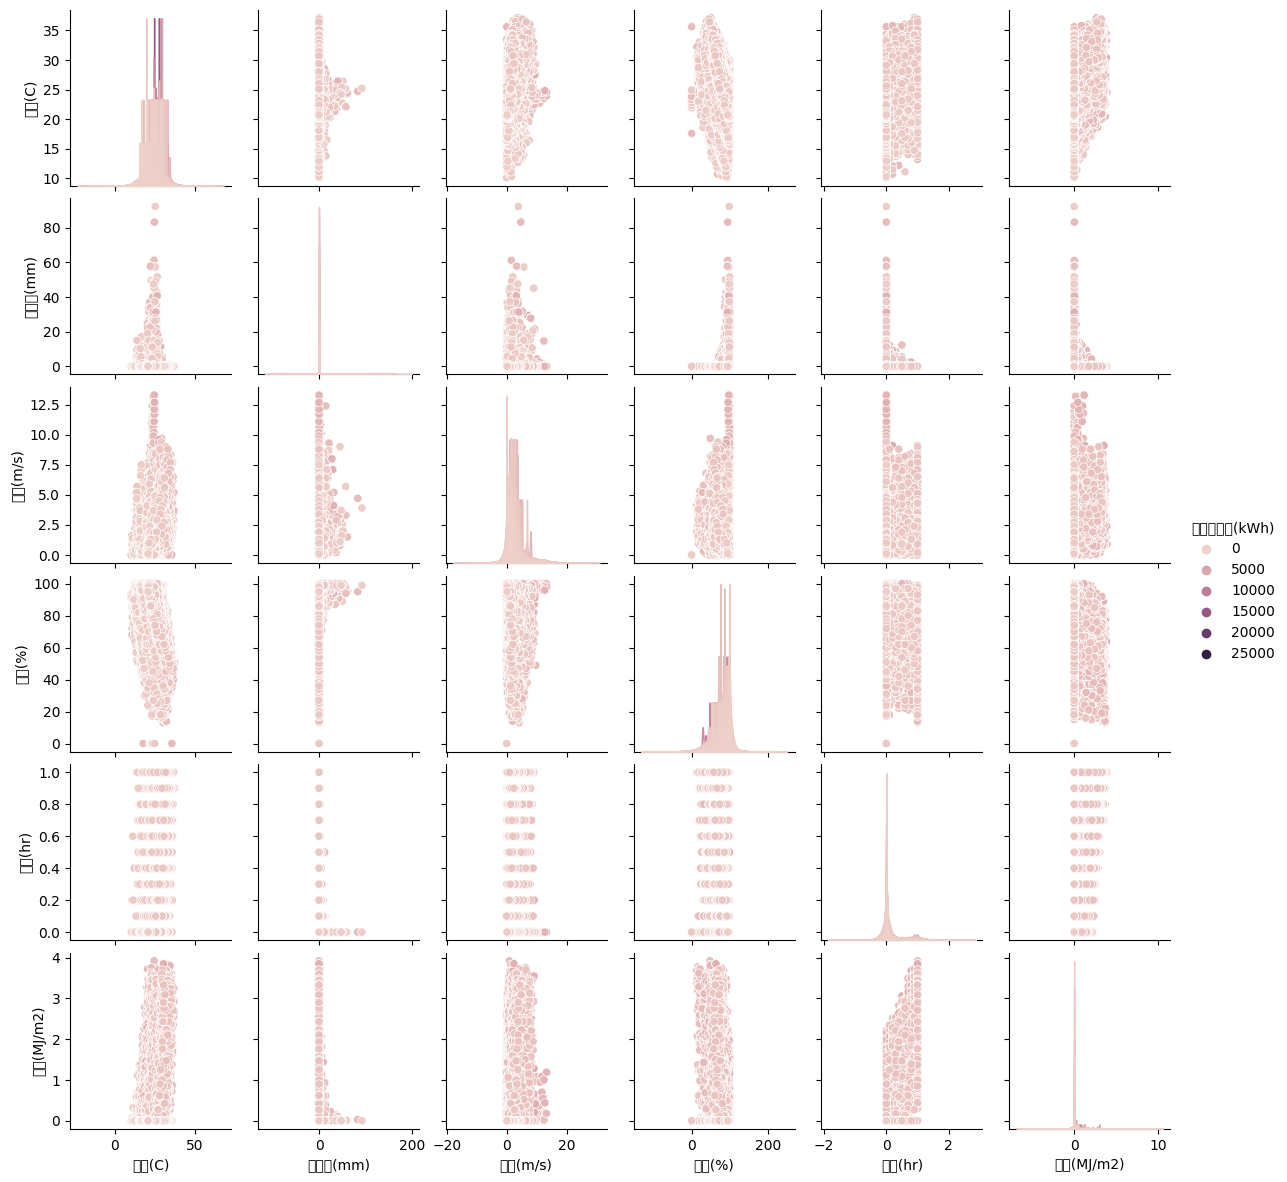

In [ ]:
sns.pairplot(train, hue="전력소비량(kWh)", size=2)